In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [123]:
data = pd.read_csv("./train.csv")

In [124]:
print(len(data))

42000


In [125]:
data_1_0 = [] 
for i in range(len(data)):
    if data["label"].loc[i] == 1 or data["label"].loc[i] == 0:
        data_1_0.append(data.loc[i])

data_1_0 = np.array(data_1_0)
data_1_0.shape

(8816, 785)

In [126]:
m,n = data_1_0.shape
np.random.shuffle(data_1_0)
y_train = data_1_0[:,0]
x_train = data_1_0[:, 1:]

x_train.shape

(8816, 784)

In [127]:
def g(z):
    return 1/(1+np.exp(-z))

def cost(x, y, w, b):
    m, n = x.shape
    total_cost = 0
    for i in range(m):
        z = np.dot(x[i], w) + b
        f_wb_i = g(z)
        total_cost += -y[i] * np.log(f_wb_i + 1e-7) - (1 - y[i]) * np.log(1 - f_wb_i + 1e-7)
    return total_cost / m   


def dif_w_b(w,x,y,b):
    m,n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        f_wb_i = g(np.matmul(x[i],w)+b)
        err_i = f_wb_i-y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * x[i,j]
        dj_db += err_i
    dj_dw/=m
    dj_db/=m
    return dj_db,dj_dw

def gradient_descent(x,y,w,b,alpha,iters):
    history =[]
    for i in range(iters):

        dj_db, dj_dw = dif_w_b(w, x, y, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i<100000 and i != 0:
            history.append( cost(x, y, w, b) )

        if i% math.ceil(iters / 10) == 0 and i != 0:
            print(f"Iteration {i:4d}: Cost {history[-1]}   ")
    return w,b,history 


In [141]:
alpha = 0.000001
inter =500
w_tmp  = np.zeros_like(x_train[0])
b_tmp  = 0.
w_out, b_out, history = gradient_descent(x_train,y_train,w_tmp,b_tmp,alpha,inter)

Iteration   50: Cost 0.045731465009392444   
Iteration  100: Cost 0.02779364713475859   
Iteration  150: Cost 0.021005031786729002   
Iteration  200: Cost 0.017326472274536667   
Iteration  250: Cost 0.014979106874857807   
Iteration  300: Cost 0.013332445021552529   
Iteration  350: Cost 0.012103513797890196   
Iteration  400: Cost 0.011145372613474286   
Iteration  450: Cost 0.010373692961750842   


In [142]:
history[-1]

0.009748073966791568

<function matplotlib.pyplot.show(close=None, block=None)>

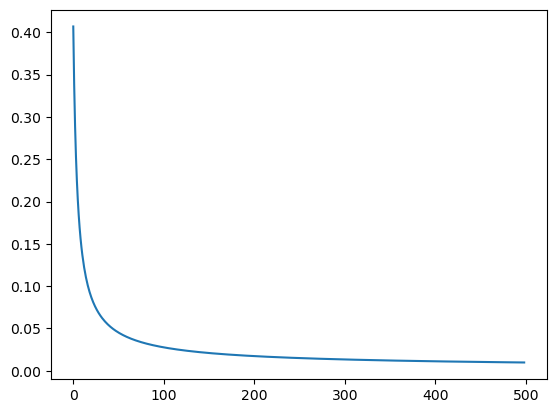

In [143]:
plt.plot(history)
plt.show

In [144]:
with open("w.txt", "w") as f:
    for i in range(len(w_out)):
        f.write(str(w_out[i]))
        f.write(" ")

In [146]:
with open("b.txt", "w") as f:
    f.write(str(b_out))

In [147]:
def check(z):
    return 1 if g(z) >= 0.5 else 0

In [148]:
with open('w.txt', 'r') as file:
    content_w = file.read()
with open('b.txt', 'r') as file:
    content_b = file.read()
w = [float(x) for x in content_w.split()]
b = float(content_b.split()[0])
w  = np.array([w])

In [149]:
correct = 0
m = x_train.shape[0]
x1 = 0
x0 = 0
for i in range(m):
    z = np.dot(w_out, x_train[i]) + b_out
    label = check(z)
    if label == y_train[i]:
        correct += 1
accuracy = correct / m
print(f"Accuracy = {accuracy:.4f}")

Accuracy = 0.9981
